# Verify the dSPN input tuning

Here we run a network of neurons to verify the input tuning, and check the distribution of firing frequencies.

In [1]:
import os
from snudda.input.input_tuning import InputTuning

# Let's run FS for now, to do it faster
neuron_type = "dspn"
input_type = "cortical"
seed_list = None
input_duration = 10
input_frequency_range= [0, 5, 10, 20, 30, 40]
network_path = os.path.join("networks", f"verify_{neuron_type}_input_tuning")

os.environ["SNUDDA_DATA"] = "../../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example."

In [2]:
input_tuning = InputTuning(network_path)
input_tuning.setup_network(neurons_path = os.path.join("$DATA", "neurons", "striatum"),
                           num_replicas=1,
                           neuron_types=neuron_type)
input_tuning.setup_input_verification(input_type=input_type, neuron_type=neuron_type,
                                      input_frequency_range=input_frequency_range,
                                      input_duration=input_duration,
                                      generate=True, seed_list=seed_list)

Reading SNUDDA_DATA=../../../../../BasalGangliaData/data/ from environment variable $SNUDDA_DATA
Found 144 neuron models in /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Skipping neuron type fs
Skipping neuron type chin
Skipping neuron type ispn
Skipping neuron type lts
Writing network config file to networks/verify_dspn_input_tuning/network-config.json
Reading SNUDDA_DATA=../../../../../BasalGangliaData/data/ from networks/verify_dspn_input_tuning/network-config.json
Generating 10928 points for data/mesh/InputTestMesh.obj
n_points = 10859, previous close_pairs = 737
n_points = 10844, previous close_pairs = 620
n_points = 10254, previous close_pairs = 590
Filtering 10254 points..
Filtering, keeping inside points: 9323 / 10254
Reading SNUDDA_DATA=../../../../../BasalGangliaData/data/ from networks/verify_dspn_input_tuning/network-config.json
No d_view specified, running distribute neurons in serial
No connections specified in connectivity_distribution.
No file networks/ve

!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_p185b99a1_m91d5391a 53 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_p185b99a1_m93f282f3 54 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_p185b99a1_mdf60297d 55 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_pb267a31a_m01df38e6 56 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_pb267a31a_m7721d5cf 57 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_pb267a31a_mf0350288 58 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_p1dc65e22_m0687467b 59 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron

!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_p77e18982_m7fe0fbde 115 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_p77e18982_m82894e90 116 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_p77e18982_mad2e6da1 117 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_p81757e87_m71f9efc2 118 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_p81757e87_m7fe0fbde 119 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_p81757e87_m80fca697 120 (meta modified by input_config)
!!! Warning, combining definition of cortical input for neuron dspn_str_dspn_e_p81757e87_m82894e90 121 (meta modified by input_config)
!!! Warning, combining definition of cortical input for

## Run the simulation

```mpiexec -n 8 python ../../../../snudda/input/input_tuning.py simulate networks/verify_dspn_input_tuning/```

## Verify output frequencies
Next we plot the output frequency distribution of the population to see that it looks good

Loading networks/verify_dspn_input_tuning/simulations/output.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
2: (dspn_str_dspn_e_p1863c9a5_m9fda9b20, p1863c9a5, m9fda9b20)
3: (dspn_str_dspn_e_p1863c9a5_mbb8e5b24, p1863c9a5, mbb8e5b24)
31: (dspn_str_dspn_e_pb0529fb9_m9fda9b20, pb0529fb9, m9fda9b20)
54: (dspn_str_dspn_e_p185b99a1_m93f282f3, p185b99a1, m93f282f3)
55: (dspn_str_dspn_e_p185b99a1_mdf60297d, p185b99a1, mdf60297d)
58: (dspn_str_dspn_e_pb267a31a_mf0350288, pb267a31a, mf0350288)
98: (dspn_str_dspn_e_p4e92e4bc_m71f9efc2, p4e92e4bc, m71f9efc2)
99: (dspn_str_dspn_e_p4e92e4bc_m7fe0fbde, p4e92e4bc, m7fe0fbde)
101: (dspn_str_dspn_e_p4e92e4bc_m82894e90, p4e92e4bc, m82894e90)
103: (dspn_str_dspn_e_p4e92e4bc_mc44c4566, p4e92e4bc, mc44c4566)
107: (dspn_str_dspn_e_p6c462b98_mad2e6da1, p6c462b98, mad2e6da1)
108: (dspn_str_dspn_e_p6c462b98_mc44c4566, p6c462b98, mc44c4566)
109: (dspn_str_dspn_e_p75cab3ca_m71f9efc2, p75cab3ca, m71f9efc2)
112: (d

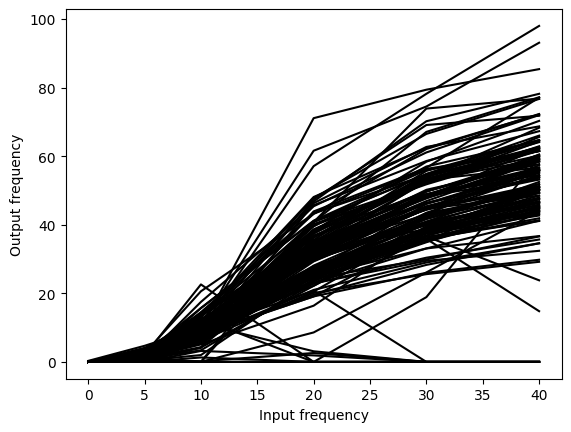

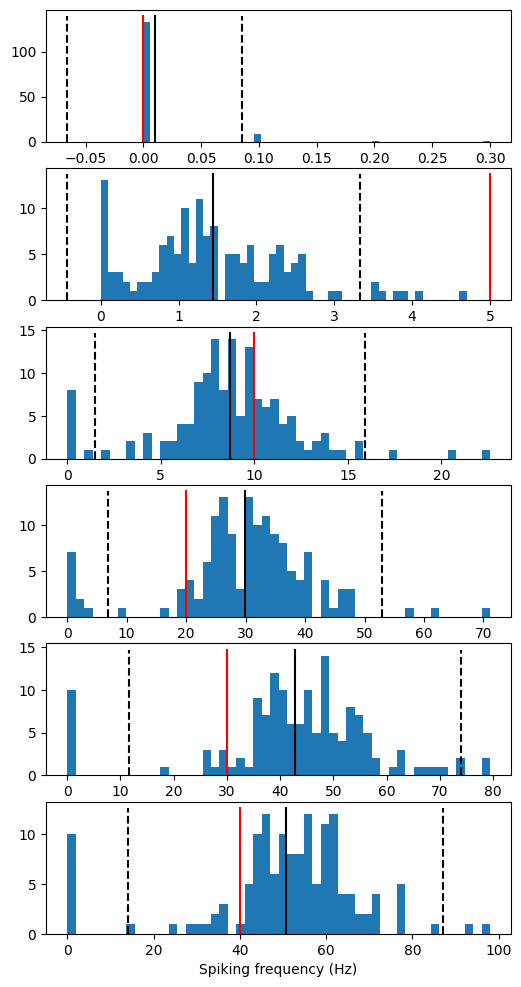

Frequency outliers: dspn_str_dspn_e_p1863c9a5_m9fda9b20 (2) -- [0.  1.1 0.  0.  0.  0. ] Hz
$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026
Frequency outliers: dspn_str_dspn_e_p1863c9a5_mbb8e5b24 (3) -- [ 0.   1.9  9.4 20.8  0.   0. ] Hz
$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026
Frequency outliers: dspn_str_dspn_e_paeec7411_m7fe0fbde (133) -- [ 0.1  1.7  9.2 26.1 37.9 45.1] Hz
$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20211026
Frequency outliers: dspn_str_dspn_e_paeec7411_m82894e90 (135) -- [ 0.   1.1 17.5 45.7 58.6 67.3] Hz
$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20211026
Frequency outliers: dspn_str_dspn_e_p510bab86_mc710c1a4 (9) -- [ 0.1  1.8  7.8 30.2 48.5 53.3] Hz
$SNUDDA_DATA/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026
Frequency outliers: dspn_str_dspn_e_p510bab86_mf702205f (10) -- [ 0.   3.6 13.2 36.5 49.7 59.4] Hz
$SNUD

In [3]:
input_tuning.plot_verify_frequency_distribution(input_type="cortical")

# Plot histogram of frequency distribution